In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("D:\\csvFiles\\heart_2020_cleaned.csv")
df.head()

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes            No        Yes  
1              Yes  Very good        7.0     No            No         No  
2              Yes       Fair        8.0    Yes            No         No  
3               No       Good        6.0     No            No        Yes  
4              Yes  Very good        8.0     No            No         No

In [3]:
df.shape

(319795, 18)

In [4]:
df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [5]:
df["HeartDisease"] = df["HeartDisease"].map({"Yes":1, "No":0})
df["Smoking"] = df["Smoking"].map({"Yes":1, "No":0})
df["AlcoholDrinking"] = df["AlcoholDrinking"].map({"Yes":1, "No":0})
df["Stroke"] = df["Stroke"].map({"Yes":1, "No":0})
df["DiffWalking"] = df["DiffWalking"].map({"Yes":1, "No":0})
df["PhysicalActivity"] = df["PhysicalActivity"].map({"Yes":1, "No":0})
df["Asthma"] = df["Asthma"].map({"Yes":1, "No":0})
df["KidneyDisease"] = df["KidneyDisease"].map({"Yes":1, "No":0})
df["SkinCancer"] = df["SkinCancer"].map({"Yes":1, "No":0})
df["Sex"] = df["Sex"].map({"Female":0, "Male":1})

df.head()

HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0             0  16.60        1                0       0             3.0   
1             0  20.34        0                0       1             0.0   
2             0  26.58        1                0       0            20.0   
3             0  24.21        0                0       0             0.0   
4             0  23.71        0                0       0            28.0   

   MentalHealth  DiffWalking  Sex  AgeCategory   Race Diabetic  \
0          30.0            0    0        55-59  White      Yes   
1           0.0            0    0  80 or older  White       No   
2          30.0            0    1        65-69  White      Yes   
3           0.0            0    0        75-79  White       No   
4           0.0            1    0        40-44  White       No   

   PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  SkinCancer  
0                 1  Very good        5.0       1              0           1  
1                 1  Very good        7.0       0              0           0  
2                 1       Fair        8.0       1              0           0  
3                 0       Good        6.0       0              0           1  
4                 1  Very good        8.0       0              0           0

In [6]:
df = df.drop({"AgeCategory","Race","GenHealth","Diabetic"}, axis=1)
df.head()

HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0             0  16.60        1                0       0             3.0   
1             0  20.34        0                0       1             0.0   
2             0  26.58        1                0       0            20.0   
3             0  24.21        0                0       0             0.0   
4             0  23.71        0                0       0            28.0   

   MentalHealth  DiffWalking  Sex  PhysicalActivity  SleepTime  Asthma  \
0          30.0            0    0                 1        5.0       1   
1           0.0            0    0                 1        7.0       0   
2          30.0            0    1                 1        8.0       1   
3           0.0            0    0                 0        6.0       0   
4           0.0            1    0                 1        8.0       0   

   KidneyDisease  SkinCancer  
0              0           1  
1              0           0  
2              0           0  
3              0           1  
4              0           0

In [7]:
x = df.drop("HeartDisease",axis = 1)
y = df["HeartDisease"]

In [8]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.7,random_state=30)
x_train.shape, y_train.shape

((95938, 13), (95938,))

In [9]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=30,n_jobs=-1,max_depth=5,n_estimators=100, oob_score=True)
clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=30)

In [10]:
clf.oob_score_

0.9142362775959474

In [11]:
pred = clf.predict(x_test)

In [12]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred)

0.9148518920560894

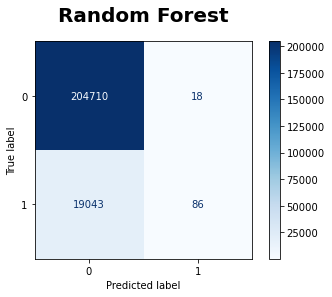

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, pred)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm)
disp_log = disp_log.plot(cmap=plt.cm.Blues,values_format='g')
plt.title("Random Forest", pad= 20, fontsize= 20, fontweight= "bold")
plt.show()

In [14]:
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus
from subprocess import call

feature_cols = x.columns
estimator = clf.estimators_[10]
export_graphviz(estimator, out_file='tree.dot', filled=True, rounded=True, special_characters=True,feature_names = feature_cols)
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
Image(filename = 'tree.png')